## Introduction:

Business objective: Develop a binary classification system which will classify a candidate scholarly article's text content as to whether it belongs to the subject area Information Theory or not.

## Objectives and validation strategy:

Model output will be either a 1 (article is predicted to be in the Information Theory subject area) or a 0 in which case the article is not in the subject area. Performance of the model will be measured using standard accuracy and confusion  matricies metrics. This will be applied on a test and training data set to see how overfit the model is on the data and if any changes need to be made. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from tqdm import tqdm
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from datetime import timedelta, date, datetime

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeandre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
arx = pd.read_csv('/Users/jeandre/Desktop/Applied Machine Learning/Post Block Assignment 3/arxiv2017.csv', sep=';')

In [3]:
arx.head()

,ID,Date,Title,Abstract,Subject_area
0,0912.5014v1,26/12/2009,A User's Guide to Zot,Zot is an agile and easily extendible bounded ...,LO
1,0910.0820v2,05/10/2009,Prediction of Zoonosis Incidence in Human usin...,Zoonosis refers to the transmission of infecti...,LG
2,1505.01933v1,08/05/2015,Wireless Multicast for Zoomable Video Streaming,Zoomable video streaming refers to a new class...,NI
3,1512.02794v2,09/12/2015,On Computing the Minkowski Difference of Zonot...,Zonotopes are becoming an increasingly popular...,CG
4,cs_0701171v1,26/01/2007,The Zones Algorithm for Finding Points-Near-a-...,Zones index an N-dimensional Euclidian or metr...,DB


In [4]:
arx["IT"] = np.where(arx["Subject_area"].str.contains("IT"), 1, 0)
arx.drop(["ID","Subject_area"],axis=1,inplace=True)

In [5]:
arx.head(20)
arx.dropna(inplace = True)

In [6]:
X = arx[list(arx.columns[1:-1])]
Y = arx["IT"]
X["text"] = X["Title"]+" "+X["Abstract"]
X.drop(["Title","Abstract"],axis=1,inplace = True)

<ipython-input-6-6a21afcde1ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X["text"], Y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(105251,)

In [9]:
Y_train.shape

(105251,)

In [10]:
vect1 = CountVectorizer()
vect2 = CountVectorizer(max_features=30000,min_df=2,max_df=0.8,stop_words=stopwords.words('english'),ngram_range=(2,2))
X_train_counts1 = vect1.fit_transform(X_train)
X_test_counts1 = vect1.transform(X_test)
X_train_counts2 = vect2.fit_transform(X_train)
X_test_counts2 = vect2.transform(X_test)
print("vect1 shape = ",X_train_counts1.shape,"vect2 shape = ",X_train_counts2.shape)

vect1 shape =  (105251, 110102) vect2 shape =  (105251, 30000)


In [11]:
clf1 = RandomForestClassifier(random_state=0,oob_score=True)
clf1.fit(X_train_counts1, Y_train)
clf2 = RandomForestClassifier(random_state=0,oob_score=True)
clf2.fit(X_train_counts2, Y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [12]:
F_pred1 = clf1.predict(X_test_counts1)
F_pred2 = clf2.predict(X_test_counts2)

In [13]:
print("Accuracy score =",metrics.balanced_accuracy_score(Y_test,F_pred1))
print("Precision score =",metrics.precision_score(Y_test,F_pred1,average='binary',pos_label=1))
print("Positive case Recall = ",metrics.recall_score(Y_test,F_pred1,average='binary',pos_label=1))
print("Negative case Recall = ",metrics.recall_score(Y_test,F_pred1,average='binary',pos_label=0))

Accuracy score = 0.8089686610807825
Precision score = 0.9337873628452517
Positive case Recall =  0.6257606490872211
Negative case Recall =  0.992176673074344


In [14]:
print(clf1.oob_score_)

0.9321336614378961


In [15]:
values = [0,1]

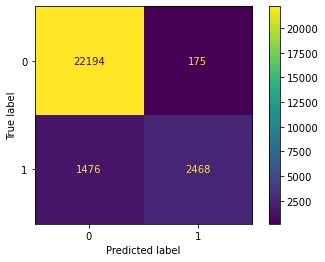

In [16]:
metrics.plot_confusion_matrix(clf1,X_test_counts1,Y_test,display_labels=values) 

In [17]:
print("Accuracy score =",metrics.balanced_accuracy_score(Y_test,F_pred2))
print("Precision score =",metrics.precision_score(Y_test,F_pred2,average='binary',pos_label=1))
print("Positive case Recall = ",metrics.recall_score(Y_test,F_pred2,average='binary',pos_label=1))
print("Negative case Recall = ",metrics.recall_score(Y_test,F_pred2,average='binary',pos_label=0))

Accuracy score = 0.8837454922357504
Precision score = 0.8268876611418048
Positive case Recall =  0.7969066937119675
Negative case Recall =  0.9705842907595332


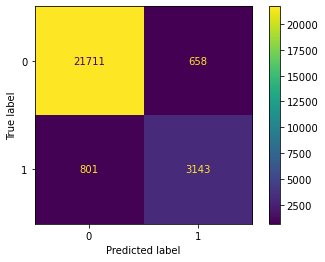

In [18]:
metrics.plot_confusion_matrix(clf2,X_test_counts2,Y_test,display_labels=values) 

In [28]:
arx2019 = pd.read_csv('/Users/jeandre/Desktop/Applied Machine Learning/Post Block Assignment 3/arxiv2019.csv', sep=';')

In [29]:
arx2019['Date'] = pd.to_datetime(arx2019.Date)
arx2019.sort_values(by=['Date'], inplace=True, ascending=True)

In [30]:
print(min(arx2019["Date"])-timedelta(days=1))
print(max(arx2019["Date"]))
timedelta(days=10)

bins_dt = pd.date_range(start=min(arx2019["Date"]-timedelta(days=1)),end=(max(arx2019["Date"])), periods=9)
bins_str = bins_dt.astype(str).values

labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

arx2019['cat'] = pd.cut(arx2019.Date.astype(np.int64)//10**9,
                   bins=bins_dt.astype(np.int64)//10**9,
                   labels=labels)

binss = arx2019['cat'].unique().tolist()
#binss.append(binss.pop(binss.index(binss[0])))

bin_dict = {binn: arx2019.loc[arx2019.cat==binn] for binn in binss}
binss

2017-12-31 00:00:00
2019-12-10 00:00:00


['(2017-12-31 00:00:00, 2018-03-29 15:00:00]',
 '(2018-03-29 15:00:00, 2018-06-26 06:00:00]',
 '(2018-06-26 06:00:00, 2018-09-22 21:00:00]',
 '(2018-09-22 21:00:00, 2018-12-20 12:00:00]',
 '(2018-12-20 12:00:00, 2019-03-19 03:00:00]',
 '(2019-03-19 03:00:00, 2019-06-15 18:00:00]',
 '(2019-06-15 18:00:00, 2019-09-12 09:00:00]',
 '(2019-09-12 09:00:00, 2019-12-10 00:00:00]']

In [31]:
acc_scores = {"date" :[],"score": []}
pos_scores = {"date" :[],"score": []}
X_total = X_train
Y_total = Y_train
X_prev = pd.Series()
Y_prev = pd.Series()
for x in binss:
    
    
    arx2019 = bin_dict[x]
    arx2019["IT"] = np.where(arx2019["Subject_area"].str.contains("IT"), 1, 0)
    arx2019.drop(["ID","Subject_area"],axis=1,inplace=True)

    arx2019.dropna(inplace = True)
    X = arx2019[list(arx2019.columns[1:-1])]
    Y = arx2019["IT"]
    X["text"] = X["Title"]+" "+X["Abstract"]
    X.drop(["Title","Abstract"],axis=1,inplace = True)
    X = X["text"]
    X_total = pd.concat([X_total,X_prev],ignore_index=True)
    X_total_counts = vect2.fit_transform(X_total)
    X_counts3 = vect2.transform(X)
    Y_total = pd.concat([Y_total,Y_prev],ignore_index=True)
    
    clf2.fit(X_total_counts,Y_total)

    F_pred3 = clf2.predict(X_counts3)
    print("Testing date range:",x)
    print(arx2019.head(1))
    print("Accuracy score =",metrics.balanced_accuracy_score(Y,F_pred3))
    print("Precision score =",metrics.precision_score(Y,F_pred3,average='binary',pos_label=1))
    print("Positive case Recall = ",metrics.recall_score(Y,F_pred3,average='binary',pos_label=1))
    print("Negative case Recall = ",metrics.recall_score(Y,F_pred3,average='binary',pos_label=0))
    acc_scores["date"].append(x)
    acc_scores["score"].append(metrics.balanced_accuracy_score(Y,F_pred3))
    pos_scores["date"].append(x)
    pos_scores["score"].append(metrics.recall_score(Y,F_pred3,average='binary',pos_label=1))
    X_prev = X
    Y_prev = Y


<ipython-input-31-3fbcb8d7decd>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_prev = pd.Series()
<ipython-input-31-3fbcb8d7decd>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Y_prev = pd.Series()
<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

Testing date range: (2017-12-31 00:00:00, 2018-03-29 15:00:00]
          Date                                              Title  \
843 2018-01-01  A Comparative Study of LOWESS and RBF Approxim...   

                                              Abstract  \
843  Approximation methods are widely used in many ...   

                                            cat  IT  
843  (2017-12-31 00:00:00, 2018-03-29 15:00:00]   0  
Accuracy score = 0.8887928314664242
Precision score = 0.7744807121661721
Positive case Recall =  0.7981651376146789
Negative case Recall =  0.9794205253181695


<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Testing date range: (2018-03-29 15:00:00, 2018-06-26 06:00:00]
            Date                                              Title  \
44483 2018-03-30  Multiplying boolean Polynomials with Frobenius...   

                                                Abstract  \
44483  We show a new algorithm and its implementation...   

                                              cat  IT  
44483  (2018-03-29 15:00:00, 2018-06-26 06:00:00]   0  
Accuracy score = 0.8662305191517297
Precision score = 0.7563150074294205
Positive case Recall =  0.7518463810930576
Negative case Recall =  0.9806146572104019


<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Testing date range: (2018-06-26 06:00:00, 2018-09-22 21:00:00]
            Date                                              Title  \
19998 2018-06-27  Deep Steganalysis: End-to-End Learning with Su...   

                                                Abstract  \
19998  Recently, deep learning has shown its power in...   

                                              cat  IT  
19998  (2018-06-26 06:00:00, 2018-09-22 21:00:00]   0  
Accuracy score = 0.8698268001307039
Precision score = 0.7545909849749582
Positive case Recall =  0.7583892617449665
Negative case Recall =  0.9812643385164415


<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Testing date range: (2018-09-22 21:00:00, 2018-12-20 12:00:00]
            Date                                              Title  \
38001 2018-09-23  Learning and Evaluating Sparse Interpretable S...   

                                                Abstract  \
38001  Previous research on word embeddings has shown...   

                                              cat  IT  
38001  (2018-09-22 21:00:00, 2018-12-20 12:00:00]   0  
Accuracy score = 0.8562758863129172
Precision score = 0.7454545454545455
Positive case Recall =  0.7282415630550622
Negative case Recall =  0.9843102095707722


<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Testing date range: (2018-12-20 12:00:00, 2019-03-19 03:00:00]
            Date                                              Title  \
44991 2018-12-21  NADPEx: An on-policy temporally consistent exp...   

                                                Abstract  \
44991  Reinforcement learning agents need exploratory...   

                                              cat  IT  
44991  (2018-12-20 12:00:00, 2019-03-19 03:00:00]   0  
Accuracy score = 0.8790376078111928
Precision score = 0.7715179968701096
Positive case Recall =  0.7751572327044025
Negative case Recall =  0.9829179829179829


<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Testing date range: (2019-03-19 03:00:00, 2019-06-15 18:00:00]
           Date                                              Title  \
3535 2019-03-20  A Polynomial-time Solution for Robust Registra...   

                                               Abstract  \
3535  We propose a robust approach for the registrat...   

                                             cat  IT  
3535  (2019-03-19 03:00:00, 2019-06-15 18:00:00]   0  
Accuracy score = 0.8653548766668333
Precision score = 0.7211538461538461
Positive case Recall =  0.7455268389662028
Negative case Recall =  0.9851829143674637


<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Testing date range: (2019-06-15 18:00:00, 2019-09-12 09:00:00]
            Date                                              Title  \
38705 2019-06-16  Learning Part Generation and Assembly for Stru...   

                                                Abstract  \
38705  Learning deep generative models for 3D shape s...   

                                              cat  IT  
38705  (2019-06-15 18:00:00, 2019-09-12 09:00:00]   0  
Accuracy score = 0.8810441432831293
Precision score = 0.7457627118644068
Positive case Recall =  0.775330396475771
Negative case Recall =  0.9867578900904878


<ipython-input-31-3fbcb8d7decd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"] = X["Title"]+" "+X["Abstract"]
/Users/jeandre/opt/anaconda3/envs/DS/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Testing date range: (2019-09-12 09:00:00, 2019-12-10 00:00:00]
           Date                                              Title  \
6312 2019-09-13  Addressing Semantic Drift in Question Generati...   

                                               Abstract  \
6312  Text-based Question Generation (QG) aims at ge...   

                                             cat  IT  
6312  (2019-09-12 09:00:00, 2019-12-10 00:00:00]   0  
Accuracy score = 0.8804192780134084
Precision score = 0.7742718446601942
Positive case Recall =  0.7723970944309927
Negative case Recall =  0.988441461595824


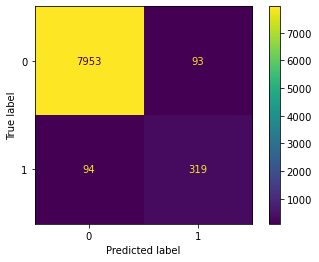

In [32]:
metrics.plot_confusion_matrix(clf2,X_counts3,Y,display_labels=values) 

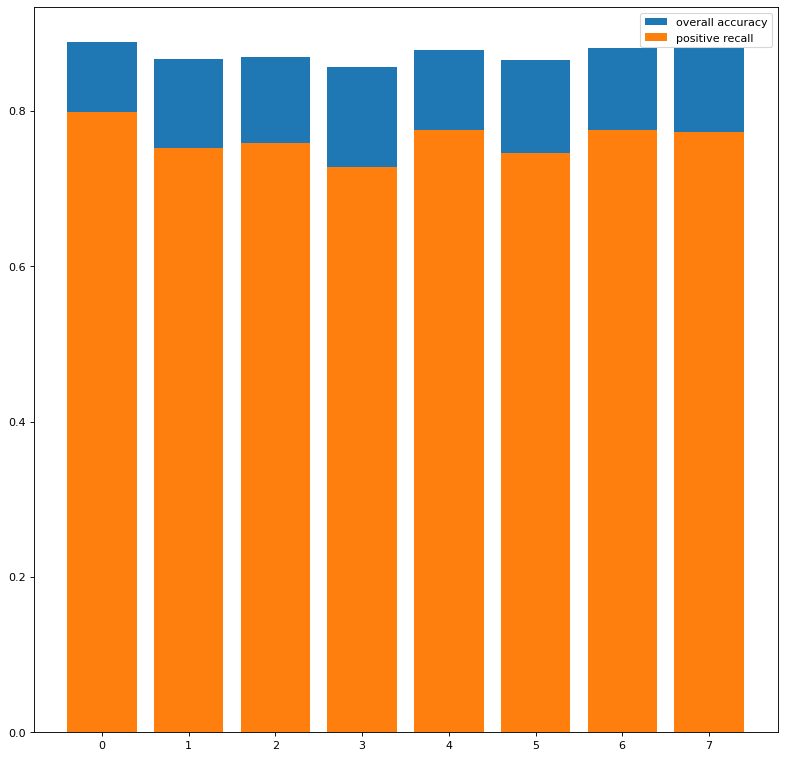

In [33]:
tickrange = range(len(acc_scores["date"]))
dates = []
for i in tickrange:
    dates.append(acc_scores["date"][i][22:33])
figure(figsize=(12, 12), dpi=80)
acc = plt.bar(tickrange, acc_scores["score"], align='center',label = "overall accuracy")
pos = plt.bar(tickrange, pos_scores["score"], align='center',label = "positive recall")
plt.legend(handles = [acc,pos])
#plt.xticks(tickrange, dates)